# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [23]:
# your answer here
import pandas as pd

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [24]:
# your answer here
employee= pd.read_csv("C:\\Users\\Zoe Mercury\\Documents\\GitHub\\Week3\\lab-pivot-table-and-correlation\\your_code\\data\\Employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is without pivot tables. Do it both ways. 


In [25]:
# Method 1
# your answer here
employee.pivot_table(index=['Department'], values= ['Salary'], aggfunc=['mean'])

,mean
,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [32]:
# Method 2
# your answer here
data1= employee.groupby(['Department'])['Salary'].mean()
data1

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [7]:
# your answer here
employee.pivot_table(index=['Title','Department'], values= ['Salary'], aggfunc=['mean'])

mean
                     Salary
Title     Department       
VP        HR           70.0
          IT           70.0
analyst   HR           32.5
          IT           32.5
associate IT           60.0
          Sales        55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [17]:
# your answer here
employee.pivot_table(index=['Title', 'Years'], values= ['Salary'],aggfunc=['mean'])

mean
                Salary
Title     Years       
VP        8         70
analyst   1         35
          2         30
          4         35
associate 2         55
          3         55
          7         60

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [70]:
# your answer here
employee.pivot_table(index=['Department', 'Title'], aggfunc={'Name':'count', 'Salary':'mean'})

#### HOW TO NOT SHOW COUONT OF SALARY??? 

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [38]:
# your answer here
table=employee.pivot_table(index=['Department', 'Title'], values= ['Salary'],aggfunc=['median','max','min','std'])
table

median    max    min       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     35     30  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     35     30  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [71]:
# your answer here
# standard deviation close to zero means it is almost equal to the mean, so I would replace it either with zero or with the mean

table.fillna(0)



median    max    min       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     35     30  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     35     30  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [74]:
# your answer here

data2= employee.pivot_table(index=['Department'], aggfunc={'Name':'count', 'Salary':'sum'})
data2


,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [75]:
# your answer here
data3= employee.pivot_table(index=['Department','Title'], aggfunc={'Years':'count', 'Salary':'mean'})
data3


Salary  Years
Department Title                   
HR         VP           70.0      1
           analyst      32.5      2
IT         VP           70.0      1
           analyst      32.5      2
           associate    60.0      1
Sales      associate    55.0      2

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [57]:
# your answer here
fitbit= pd.read_csv("C:\\Users\\Zoe Mercury\\Documents\\GitHub\\Week3\\lab-pivot-table-and-correlation\\your_code\\data\\Fitbit.csv")
fitbit.head(5)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [58]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [59]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [60]:
fitbit.mean()

Calorie burned             2741.501362
Steps                     10121.588556
Distance                      8.549128
Floors                       11.724796
Minutes Sedentary           563.934482
Minutes Lightly Active      236.405995
Minutes Fairly Active        26.163488
Minutes Very Active          35.722071
Activity Calories          2044.147139
MinutesOfSleep              290.479564
MinutesOfBeingAwake          28.008174
NumberOfAwakings             16.196185
LengthOfRestInMinutes       321.343324
dtype: float64

In [94]:
correlations=fitbit.corr()
correlations

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
Calorie burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,0.041999,0.030490,0.017460
Steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,0.124846,0.106591,0.133405
Distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,0.130447,0.091095,0.134550
Floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,0.064587,0.043459,0.075864
Minutes Sedentary,0.125353,0.076906,0.160632,0.057812,1.000000,0.217021,0.084137,0.105963,-0.161446,0.204242,0.200589,0.178387,0.208539
Minutes Lightly Active,0.209540,0.393010,0.455272,-0.085992,0.217021,1.000000,0.014288,-0.034425,-0.219892,0.105048,0.096107,0.087150,0.105406
Minutes Fairly Active,0.188256,0.303244,0.348113,0.278408,0.084137,0.014288,1.000000,0.337839,-0.204562,0.114950,0.104303,0.100498,0.123034
Minutes Very Active,0.197881,0.571452,0.759310,0.399503,0.105963,-0.034425,0.337839,1.000000,-0.187309,0.108018,0.116559,0.099859,0.115641
Activity Calories,-0.130758,-0.160568,-0.246853,-0.155532,-0.161446,-0.219892,-0.204562,-0.187309,1.000000,-0.005804,0.010859,0.022757,-0.004992
MinutesOfSleep,0.011485,0.130986,0.129442,0.069464,0.204242,0.105048,0.114950,0.108018,-0.005804,1.000000,0.779595,0.780512,0.997184


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [76]:
correlations1=fitbit.corr()['Minutes Very Active']['Steps']
correlations1

0.571451848106261

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

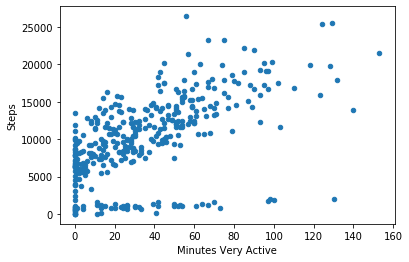

In [67]:
# your answer here
fitbit.plot.scatter(x = "Minutes Very Active", y = 'Steps')

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [77]:
# your answer here
correlations2=fitbit.corr()['Minutes Sedentary']['Steps']
correlations2

0.07690608062990092

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

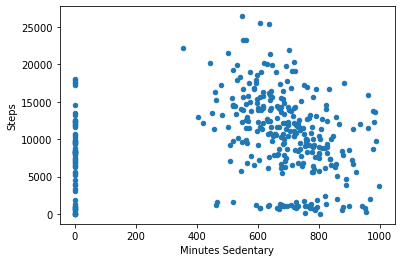

In [79]:
# your answer here
fitbit.plot.scatter(x = "Minutes Sedentary", y = 'Steps')

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [83]:
# your answer here
correlations2=fitbit.corr()['MinutesOfSleep']['Steps']
correlations2

0.1309856595083637

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

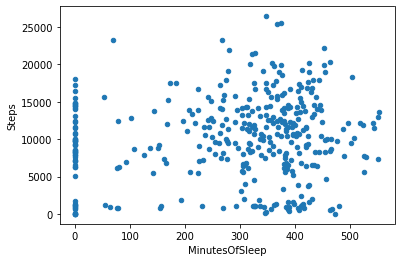

In [81]:
# your answer here
fitbit.plot.scatter(x = "MinutesOfSleep", y = 'Steps')

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [100]:
# your answer here
fitbit2=fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]
fitbit2

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407
...,...,...,...,...,...,...
362,3796,18588,16,599.000,79,377
363,3525,16382,16,684.000,55,406
364,3649,21913,19,701.000,90,280
365,3539,19023,15,575.000,85,370


In [101]:
fitbit2.corr()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [102]:
fitbit.corr()['Steps']

Calorie burned            0.255305
Steps                     1.000000
Distance                  0.779678
Floors                    0.306511
Minutes Sedentary         0.076906
Minutes Lightly Active    0.393010
Minutes Fairly Active     0.303244
Minutes Very Active       0.571452
Activity Calories        -0.160568
MinutesOfSleep            0.130986
MinutesOfBeingAwake       0.124846
NumberOfAwakings          0.106591
LengthOfRestInMinutes     0.133405
Name: Steps, dtype: float64

In [ ]:
#Distance has the highest correlation with Steps 0.779678

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [105]:
# your answer here
time_grades= pd.read_csv("C:\\Users\\Zoe Mercury\\Documents\\GitHub\\Week3\\lab-pivot-table-and-correlation\\your_code\\data\\Time_Grades.csv")
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

(array([2., 3., 1., 9.]),
 array([1., 3., 5., 7., 9.]),
 <a list of 4 Patch objects>)

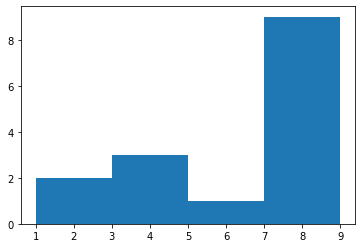

In [118]:
# your answer here
                      
import matplotlib.pyplot as plt

plt.hist(time_grades['Grade'], bins=4)


(array([5., 5., 3., 2.]),
 array([ 2. ,  6.5, 11. , 15.5, 20. ]),
 <a list of 4 Patch objects>)

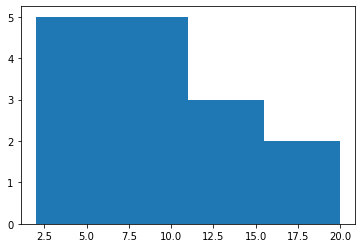

In [120]:
plt.hist(time_grades['Study time'], bins=4)

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [107]:
# your answer here
time_grades.corr(method='pearson')


,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [108]:
time_grades.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

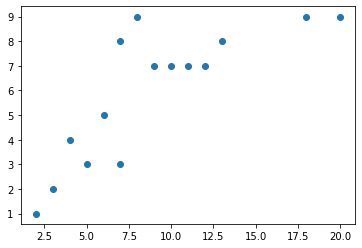

In [119]:
# your answer here
plt.scatter(time_grades['Study time'],time_grades['Grade'])
plt.show()
#shift twice tab

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here
